In [25]:
#Importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#Fetching the dataset
df=pd.read_csv('../Dataset/accidents_2012_to_2014.csv')
df

C:\Users\Ayush Pratap Singh\AppData\Local\Temp\ipykernel_11640\455028202.py:2: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('../Dataset/accidents_2012_to_2014.csv')


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19-01-2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04-01-2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10-01-2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18-01-2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17-01-2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002890,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,2.01E+12,310037,597647,-3.417278,55.264773,98,2,2,1,07-12-2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
464693,2.01E+12,321509,574063,-3.230255,55.054855,98,3,2,2,11-12-2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
464694,2.01E+12,321337,566365,-3.230826,54.985668,98,3,1,1,09-12-2014,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
464695,2.01E+12,323869,566853,-3.191397,54.990446,98,2,3,2,17-12-2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [27]:
#cut the dataset and reduce rows to 20000
df=df.iloc[:20000,:]

In [28]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19-01-2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04-01-2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10-01-2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18-01-2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17-01-2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002890,2012


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               20000 non-null  object 
 1   Location_Easting_OSGR                        20000 non-null  int64  
 2   Location_Northing_OSGR                       20000 non-null  int64  
 3   Longitude                                    20000 non-null  float64
 4   Latitude                                     20000 non-null  float64
 5   Police_Force                                 20000 non-null  int64  
 6   Accident_Severity                            20000 non-null  int64  
 7   Number_of_Vehicles                           20000 non-null  int64  
 8   Number_of_Casualties                         20000 non-null  int64  
 9   Date                                         20000 non-null  object 
 10

In [30]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,Junction_Detail,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,20000.00000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,0.0,20000.000000,20000.000000,20000.000000,20000.0
mean,531417.59750,180515.91650,-0.107716,51.508165,1.883600,2.857600,1.77450,1.184450,4.129300,23.697800,3.721700,560.199800,30.774500,NaN,3.652100,212.569300,1.028150,2012.0
std,9474.20639,6514.47768,0.136713,0.058363,6.383611,0.368143,0.60751,0.559235,1.897673,76.175841,1.136536,1138.951622,4.368765,NaN,2.719584,750.545012,0.165405,0.0
min,503800.00000,157800.00000,-0.507015,51.304140,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,NaN,-1.000000,0.000000,1.000000,2012.0
25%,525330.00000,175990.00000,-0.195611,51.468136,1.000000,3.000000,1.00000,1.000000,3.000000,6.000000,3.000000,0.000000,30.000000,NaN,3.000000,0.000000,1.000000,2012.0
50%,530975.00000,180980.00000,-0.114687,51.512371,1.000000,3.000000,2.00000,1.000000,4.000000,11.000000,3.000000,113.000000,30.000000,NaN,5.000000,0.000000,1.000000,2012.0
75%,537480.00000,185050.00000,-0.019543,51.548578,1.000000,3.000000,2.00000,1.000000,6.000000,22.000000,5.000000,400.000000,30.000000,NaN,6.000000,1.000000,1.000000,2012.0
max,559410.00000,200770.00000,0.297345,51.690220,48.000000,3.000000,8.00000,11.000000,7.000000,570.000000,6.000000,5205.000000,70.000000,NaN,6.000000,5210.000000,2.000000,2012.0


In [31]:
#Checking For Null Values
df.isnull().sum()

Accident_Index                                     0
Location_Easting_OSGR                              0
Location_Northing_OSGR                             0
Longitude                                          0
Latitude                                           0
Police_Force                                       0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Date                                               0
Day_of_Week                                        0
Time                                               0
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
1st_Road_Class                                     0
1st_Road_Number                                    0
Road_Type                                          0
Speed_limit                                        0
Junction_Detail                               

In [32]:
# Checking for null values and printing columns with null values
null_columns = df.columns[df.isnull().any()]
print(df[null_columns].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Junction_Detail   0 non-null      float64
 1   Junction_Control  15597 non-null  object 
dtypes: float64(1), object(1)
memory usage: 312.6+ KB
None


In [9]:
#Checking For nan Values
df.isna().sum()

Accident_Index                                     0
Location_Easting_OSGR                              0
Location_Northing_OSGR                             0
Longitude                                          0
Latitude                                           0
Police_Force                                       0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Date                                               0
Day_of_Week                                        0
Time                                               0
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
1st_Road_Class                                     0
1st_Road_Number                                    0
Road_Type                                          0
Speed_limit                                        0
Junction_Detail                               

In [10]:
#Preprocessing function
def preProcess(data):
    data=data.drop(["Junction_Detail","Junction_Control"] , axis=1)
    data=data.dropna(axis=0)
    cols_to_remove=['Pedestrian_Crossing-Human_Control','Urban_or_Rural_Area','1st_Road_Class','1st_Road_Number','Road_Type','Pedestrian_Crossing-Physical_Facilities']
    data=data.drop(cols_to_remove ,axis=1)
    return data

In [11]:
#Preprocess the data
df= preProcess(df)
df.isna().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Speed_limit                                    0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Special_Conditions_a

In [12]:
#check number of rows
len(df)

20000

In [13]:
#Checking for unique values in a column
df['Light_Conditions'].unique()

array(['Darkness: Street lights present and lit',
       'Daylight: Street light present', 'Darkeness: No street lighting',
       'Darkness: Street lights present but unlit',
       'Darkness: Street lighting unknown'], dtype=object)

In [14]:
df["Weather_Conditions"].unique()

array(['Fine without high winds', 'Raining without high winds', 'Other',
       'Snowing without high winds', 'Raining with high winds',
       'Fine with high winds', 'Unknown', 'Fog or mist',
       'Snowing with high winds'], dtype=object)

In [15]:
df["Road_Surface_Conditions"].unique()

array(['Dry', 'Wet/Damp', 'Frost/Ice', 'Snow',
       'Flood (Over 3cm of water)'], dtype=object)

In [16]:
#Custom Encoding Function
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
def encodeData(data):
    data['Light_Conditions']= label_encoder.fit_transform(data['Light_Conditions'])
    data['Weather_Conditions']= label_encoder.fit_transform(data['Weather_Conditions'])
    data['Road_Surface_Conditions']= label_encoder.fit_transform(data['Road_Surface_Conditions'])
    return data

In [17]:
df = encodeData(df)
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,2nd_Road_Class,2nd_Road_Number,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19-01-2012,...,5,0,2,1,0,None,None,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04-01-2012,...,6,0,2,1,0,None,None,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10-01-2012,...,6,0,4,1,0,None,None,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18-01-2012,...,6,0,4,1,0,None,None,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17-01-2012,...,6,0,2,1,0,None,None,Yes,E01002890,2012


In [18]:
#Convert Time column to datetime
df["Time"]=pd.to_datetime(df["Time"], format='%H:%M').dt.time
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,2nd_Road_Class,2nd_Road_Number,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19-01-2012,...,5,0,2,1,0,None,None,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04-01-2012,...,6,0,2,1,0,None,None,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10-01-2012,...,6,0,4,1,0,None,None,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18-01-2012,...,6,0,4,1,0,None,None,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17-01-2012,...,6,0,2,1,0,None,None,Yes,E01002890,2012


In [19]:
df.isna().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Speed_limit                                    0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Special_Conditions_a

# Feature Extraction

C:\Users\Ayush Pratap Singh\AppData\Local\Temp\ipykernel_11640\858106496.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,linewidths=.5,cmap="YlGnBu" )


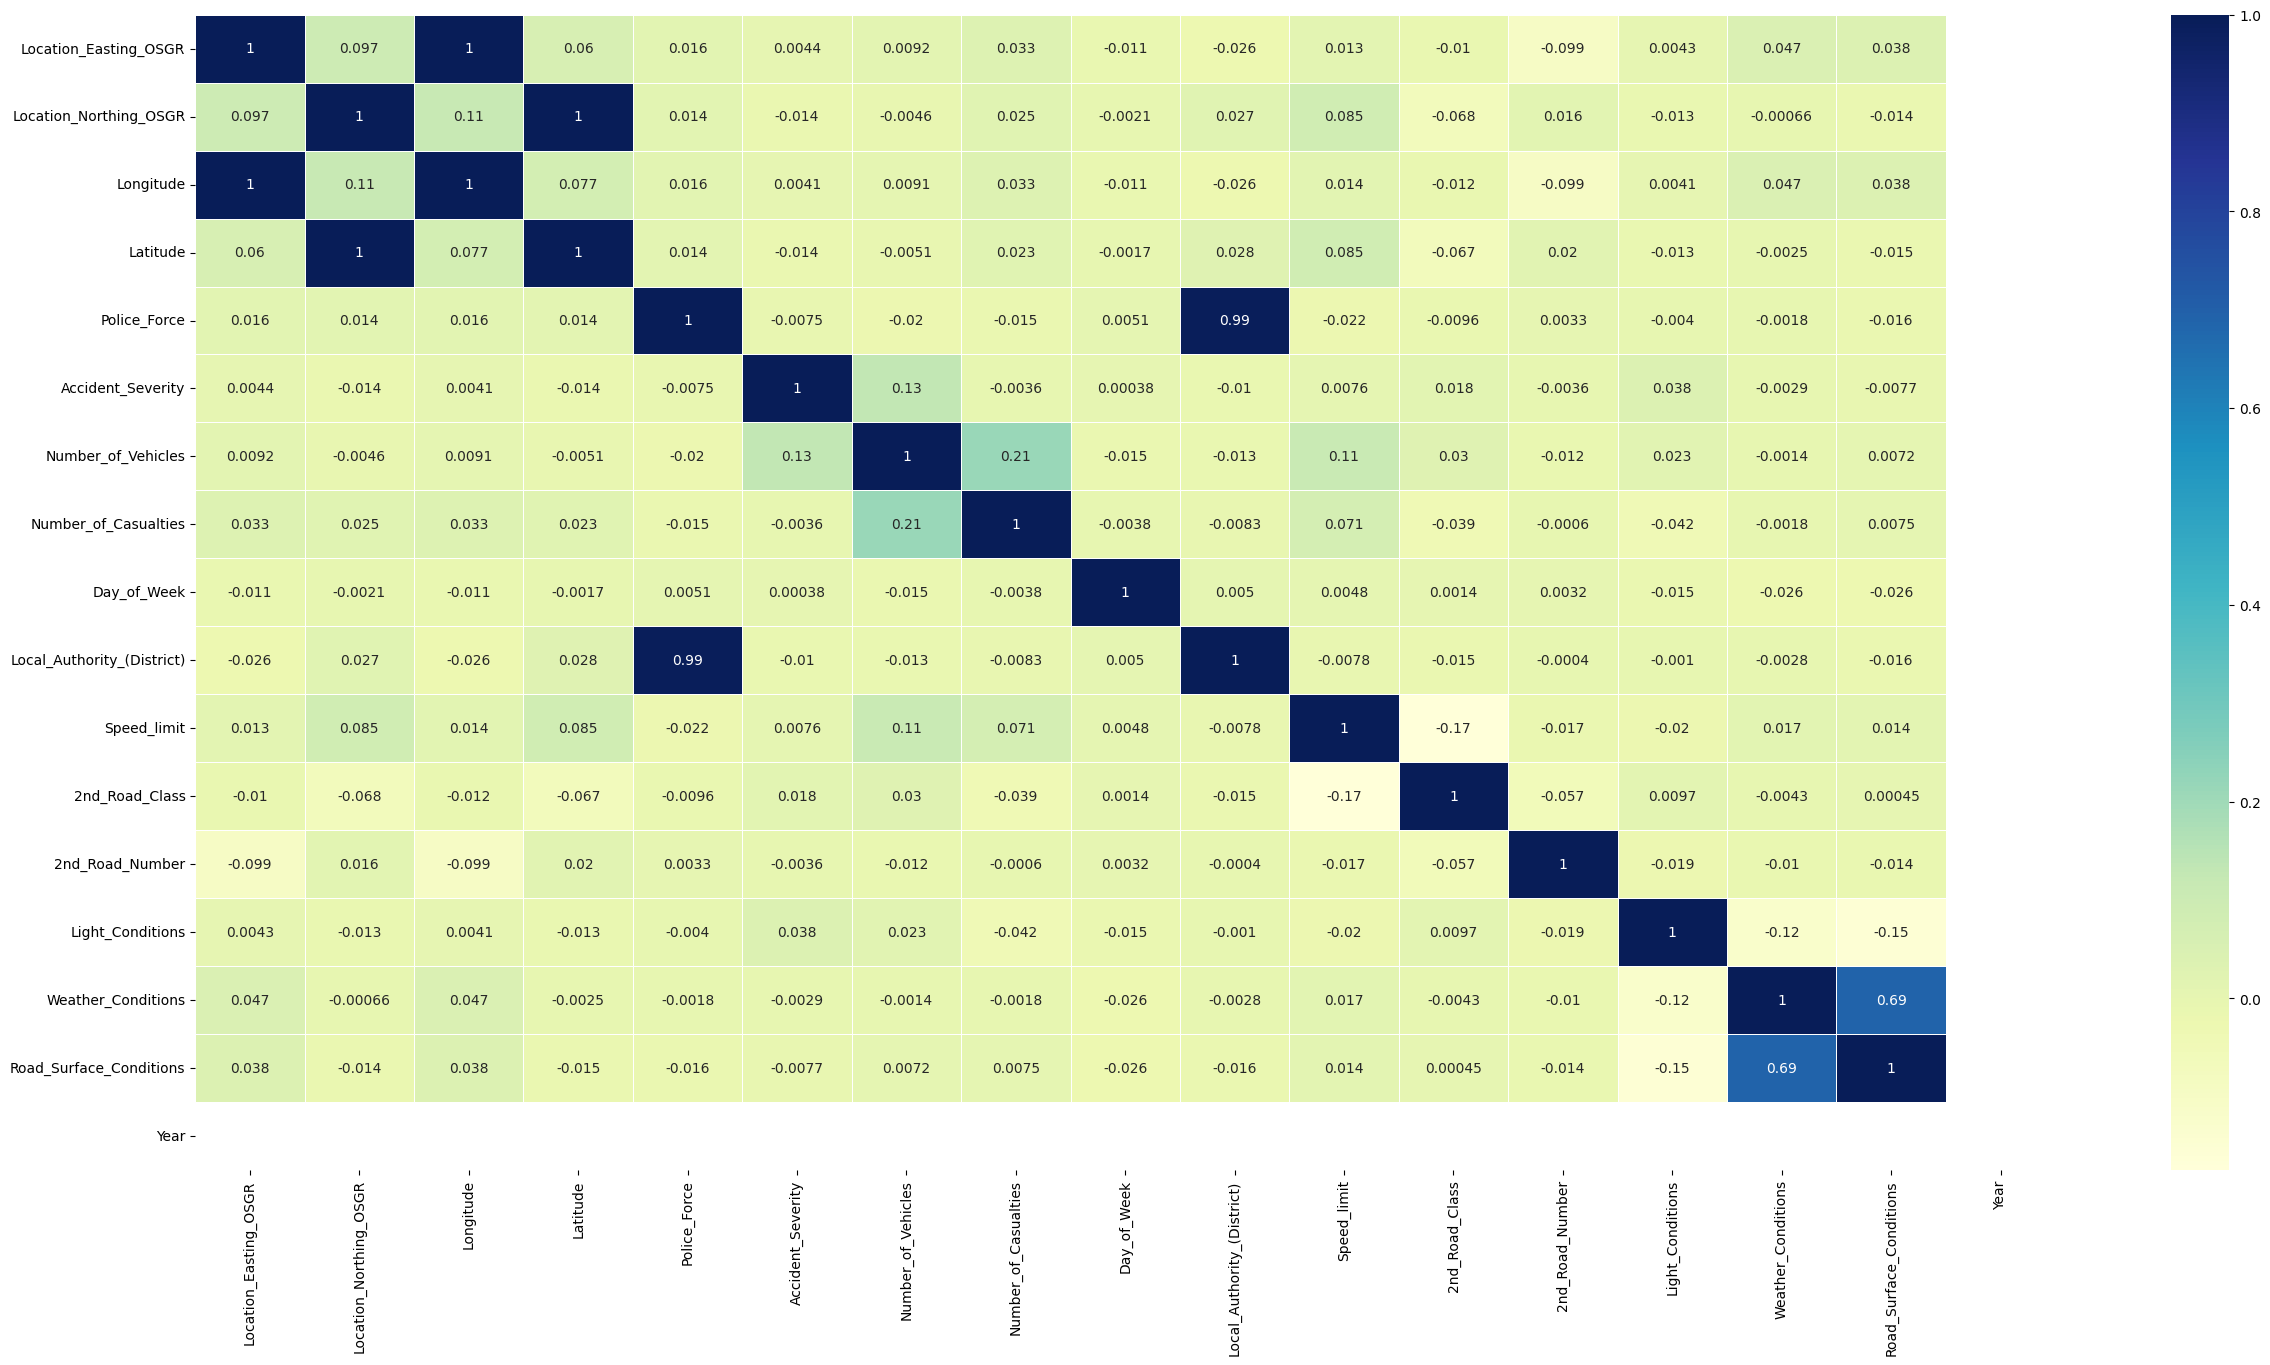

In [20]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), annot=True,linewidths=.5,cmap="YlGnBu" )
plt.show()

***Features having negative correlation with Accident_Severity do not have significant role in predicting the severity of accident***



In [21]:
x=df[["Location_Easting_OSGR","Location_Northing_OSGR","Longitude","Latitude","Day_of_Week","Speed_limit","2nd_Road_Class","Number_of_Vehicles","Light_Conditions","Weather_Conditions", "Road_Surface_Conditions", "Year"]]
y=df['Accident_Severity']
x.head(5)     

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Day_of_Week,Speed_limit,2nd_Road_Class,Number_of_Vehicles,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Year
0,527200,178760,-0.169101,51.493429,5,30,5,2,2,1,0,2012
1,524930,181430,-0.200838,51.517931,4,30,6,2,2,1,0,2012
2,525860,178080,-0.188636,51.487618,3,30,6,2,4,1,0,2012
3,524980,181030,-0.200259,51.514325,4,30,6,1,4,1,0,2012
4,526170,179200,-0.183773,51.497614,3,30,6,1,2,1,0,2012


In [23]:
print(x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Location_Easting_OSGR    20000 non-null  int64  
 1   Location_Northing_OSGR   20000 non-null  int64  
 2   Longitude                20000 non-null  float64
 3   Latitude                 20000 non-null  float64
 4   Day_of_Week              20000 non-null  int64  
 5   Speed_limit              20000 non-null  int64  
 6   2nd_Road_Class           20000 non-null  int64  
 7   Number_of_Vehicles       20000 non-null  int64  
 8   Light_Conditions         20000 non-null  int32  
 9   Weather_Conditions       20000 non-null  int32  
 10  Road_Surface_Conditions  20000 non-null  int32  
 11  Year                     20000 non-null  int64  
dtypes: float64(2), int32(3), int64(7)
memory usage: 1.6 MB
None


# Training and Testing the Model

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [66]:
dtc=DecisionTreeClassifier() # Decision Tree Classifier
rfc=RandomForestClassifier(n_estimators=200,criterion="entropy") # Random Forest Classifier
nb=GaussianNB() # Naive Bayes Classifier
lr=LogisticRegression() # Logistic Regression Classifier

In [67]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [68]:
# Splitting the dataset into the Training set and Test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [69]:
y_train.value_counts()

3    13838
2     2056
1      106
Name: Accident_Severity, dtype: int64

In [70]:
#SMOTE for Imbalanced Classification of differnet severity classification
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

In [71]:
y_train.value_counts()

3    13838
2    13838
1    13838
Name: Accident_Severity, dtype: int64

In [72]:
df.isnull().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Speed_limit                                    0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Special_Conditions_a

In [73]:
#check data types
df.dtypes

Accident_Index                                  object
Location_Easting_OSGR                            int64
Location_Northing_OSGR                           int64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
Speed_limit                                      int64
2nd_Road_Class                                   int64
2nd_Road_Number                                  int64
Light_Conditions                                 int32
Weather_Co

In [74]:
dtc.fit(x_train,y_train)
rfc.fit(x_train,y_train)
nb.fit(x_train,y_train)
lr.fit(x_train,y_train)

LogisticRegression()

In [75]:
#Predicting the test set results
de_pred=dtc.predict(x_test)
rf_pred=rfc.predict(x_test)
nb_pred=nb.predict(x_test)
lr_pred=lr.predict(x_test)

In [76]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [77]:
# Accuracy Score for Decision Tree Classifier
print("accuracy for decision tree is:{}%".format(accuracy_score(y_test,de_pred)*100))
print(classification_report(y_test,de_pred))

accuracy for decision tree is:72.475%
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        28
           2       0.17      0.25      0.20       524
           3       0.87      0.80      0.84      3448

    accuracy                           0.72      4000
   macro avg       0.35      0.35      0.35      4000
weighted avg       0.78      0.72      0.75      4000



In [78]:
print("accuracy for random forest is:{}%".format(accuracy_score(y_test,rf_pred)*100))
print(classification_report(y_test,rf_pred))

accuracy for random forest is:78.75%
              precision    recall  f1-score   support

           1       0.03      0.04      0.03        28
           2       0.19      0.16      0.17       524
           3       0.87      0.89      0.88      3448

    accuracy                           0.79      4000
   macro avg       0.36      0.36      0.36      4000
weighted avg       0.78      0.79      0.78      4000



In [79]:
print("accuracy for naive bayes is:{}%".format(accuracy_score(y_test,nb_pred)*100))
print(classification_report(y_test,nb_pred))

accuracy for naive bayes is:30.775000000000002%
              precision    recall  f1-score   support

           1       0.02      0.29      0.04        28
           2       0.14      0.73      0.24       524
           3       0.90      0.24      0.38      3448

    accuracy                           0.31      4000
   macro avg       0.35      0.42      0.22      4000
weighted avg       0.79      0.31      0.36      4000



In [80]:
print("accuracy for Logistic Regression is:{}%".format(accuracy_score(y_test,lr_pred)*100))
print(classification_report(y_test,lr_pred))

accuracy for Logistic Regression is:52.97500000000001%
              precision    recall  f1-score   support

           1       0.01      0.43      0.02        28
           2       0.16      0.23      0.19       524
           3       0.89      0.58      0.70      3448

    accuracy                           0.53      4000
   macro avg       0.35      0.41      0.30      4000
weighted avg       0.79      0.53      0.63      4000



## Saving the Model

In [81]:
## Saving the Model
import joblib
joblib.dump(rfc, 'model.joblib')

['model.joblib']

## Testing the Model on Custom Test Data

In [82]:
# Importing the test dataset
test_data = pd.read_csv('../Dataset/test.csv')
# Preprocessing the test dataset
test_data = preProcess(test_data)
test_data = encodeData(test_data)
test_data["Time"]=pd.to_datetime(test_data["Time"], format='%H:%M').dt.time
# Checking for null values
test_data.isnull().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Speed_limit                                    0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Special_Conditions_a

In [83]:
test_data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,2nd_Road_Class,2nd_Road_Number,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,2011551D57631,346570,93170,-2.758529,50.735608,55,3,2,1,21/12/2011,...,6,0,3,0,0,None,None,No,E01020500,2011
1,201150JK2H008,274050,38817,-3.767492,50.235825,50,3,1,1,24/08/2011,...,-1,0,1,3,2,None,None,Yes,E01020173,2011
2,2.00936E+12,585320,338420,0.754581,52.911211,36,3,1,1,04/05/2009,...,-1,0,3,0,2,None,None,Yes,E01026646,2009
4,201101FH10295,521750,181250,-0.246709,51.517007,1,3,2,3,01/07/2011,...,6,0,3,0,0,None,None,Yes,E01001875,2011
5,201005EE03883,336040,396570,-2.964848,53.461967,5,3,1,2,22/06/2010,...,6,0,2,0,0,None,None,No,E01006784,2010


In [84]:
#import the saved model
model = joblib.load('model.joblib')

In [85]:
# Predicting the test dataset with x and y
x_test_data = test_data[["Location_Easting_OSGR","Location_Northing_OSGR","Longitude","Latitude","Day_of_Week","Speed_limit","2nd_Road_Class","Number_of_Vehicles","Light_Conditions","Weather_Conditions", "Road_Surface_Conditions", "Year"]]
y_test_data = test_data['Accident_Severity']
y_pred = model.predict(x_test_data)


c:\Users\Ayush Pratap Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [86]:
# Accuracy Score for the test dataset
print("accuracy for test data is:{}%".format(accuracy_score(y_test_data,y_pred)*100))

accuracy for test data is:57.608695652173914%


In [87]:
print(y_test_data)

0     3
1     3
2     3
4     3
5     3
     ..
95    3
96    3
97    3
98    3
99    3
Name: Accident_Severity, Length: 92, dtype: int64


In [88]:
y_test_data.to_csv('y_test_data.csv', index=False)